<a href="https://colab.research.google.com/github/khljgkjpp52/ai_tf_detection/blob/QA05/endgame_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix



In [2]:
np.set_printoptions(suppress=True)
model = load_model("/content/drive/MyDrive/Tibame_AI_class/AI_project/EndGame_50classes/EndGame_50classes_model.h5", compile=False)
class_names = open("/content/drive/MyDrive/Tibame_AI_class/AI_project/EndGame_50classes/EndGame_50classes_labels.txt", "r").readlines()

1/1 [==============================] - 0s 64ms/step
image：209802.jpg
Class: EndGame_2457
Confidence Score: 0.9999732
----------------------------------------


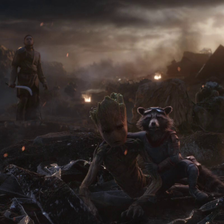

In [5]:
# ---------------單圖預測---------------
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
image_url = "/content/drive/MyDrive/Tibame_AI_class/AI_project/EndGame_50classes/50classes(not75)/scene2457/209802.jpg"
image = Image.open(image_url).convert("RGB")
size = (224, 224)
# image = ImageOps.fit(image, size, Image.Resampling.LANCZOS) # 這行會報錯Resampling is not defined
image = ImageOps.fit(image, size, Image.LANCZOS)
image_array = np.asarray(image)

normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1
data[0] = normalized_image_array

prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]
print(f"image：{image_url.split('/')[-1]}")
print("Class:", class_name[2:], end="")
print("Confidence Score:", confidence_score)
print("--"*20)
display(image)

In [ ]:
# ---------------所有圖預測---------------
image_true_path = "/content/drive/MyDrive/Tibame_AI_class/AI_project/endgame_true/"
files = os.listdir(image_true_path)     # 目錄裡所有檔案
file_extensions = ["jpg", "jpeg", "png"]  # 圖片副檔名
pre_lists = []
ans_lists = []
        
for f in files:
    if f.split(".")[-1].lower() in file_extensions: # 判斷圖片檔
        data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
        image = Image.open(f"{image_true_path}{f}").convert("RGB")
        size = (224, 224)
        # image = ImageOps.fit(image, size, Image.Resampling.LANCZOS) # 這行會報錯Resampling is not defined
        image = ImageOps.fit(image, size, Image.LANCZOS)
        image_array = np.asarray(image)
        normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1
        data[0] = normalized_image_array
        prediction = model.predict(data)
        index = np.argmax(prediction)          # 模型預測的索引值 對應到labels
        class_name = class_names[index].split(" ")[-1].replace("\n", "")
        confidence_score = prediction[0][index]     # np.max(prediction)一樣意思
        print(f"image：{f}")
        print("Class:", class_name)
        print("Confidence Score:", confidence_score)
        print("--"*20)
        # 用class name當答案
        # 圖片名稱即答案，存進ans_lists
        img_name = f.split("_")
        img_name = f"{img_name[0]}_{img_name[1]}"
        ans_lists.append(img_name)
        pre_lists.append(class_name) # 預測的class name
        
        # 用index當答案
        # pre_lists.append(index) # 預測的class name
        # img_name = f.split("_")
        # img_name = f"{img_name[0]}_{img_name[1]}"
        # for i, item in enumerate(class_names):
        #     if img_name in item:
        #         ans_lists.append(i)


In [ ]:
# ----------------------混淆矩陣------------------------
num = 250
label = list(set(ans_lists))
label.sort()
cm = confusion_matrix(ans_lists[:num], pre_lists[:num])
df = pd.DataFrame(cm, columns=label, index=label)
display(df)
# print("True -> prediction")
# for i in range(num):
#     print(ans_lists[i], "->", pre_lists[i])

,EndGame_2457,EndGame_2458,EndGame_2459,EndGame_2460,EndGame_2461,EndGame_2462,EndGame_2463,EndGame_2464,EndGame_2465,EndGame_2466,...,EndGame_2497,EndGame_2498,EndGame_2499,EndGame_2500,EndGame_2501,EndGame_2502,EndGame_2503,EndGame_2504,EndGame_2505,EndGame_2506
EndGame_2457,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EndGame_2458,0,4,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
EndGame_2459,0,0,3,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EndGame_2460,0,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EndGame_2461,0,0,0,0,4,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
EndGame_2462,0,0,0,0,0,1,1,0,0,2,...,0,0,0,0,0,0,0,0,0,0
EndGame_2463,0,0,0,0,0,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EndGame_2464,0,0,0,0,0,0,1,2,1,0,...,0,0,0,0,0,0,0,0,0,0
EndGame_2465,0,0,0,0,0,0,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0
EndGame_2466,0,0,0,0,0,0,2,0,0,3,...,0,0,0,0,0,0,0,0,0,0


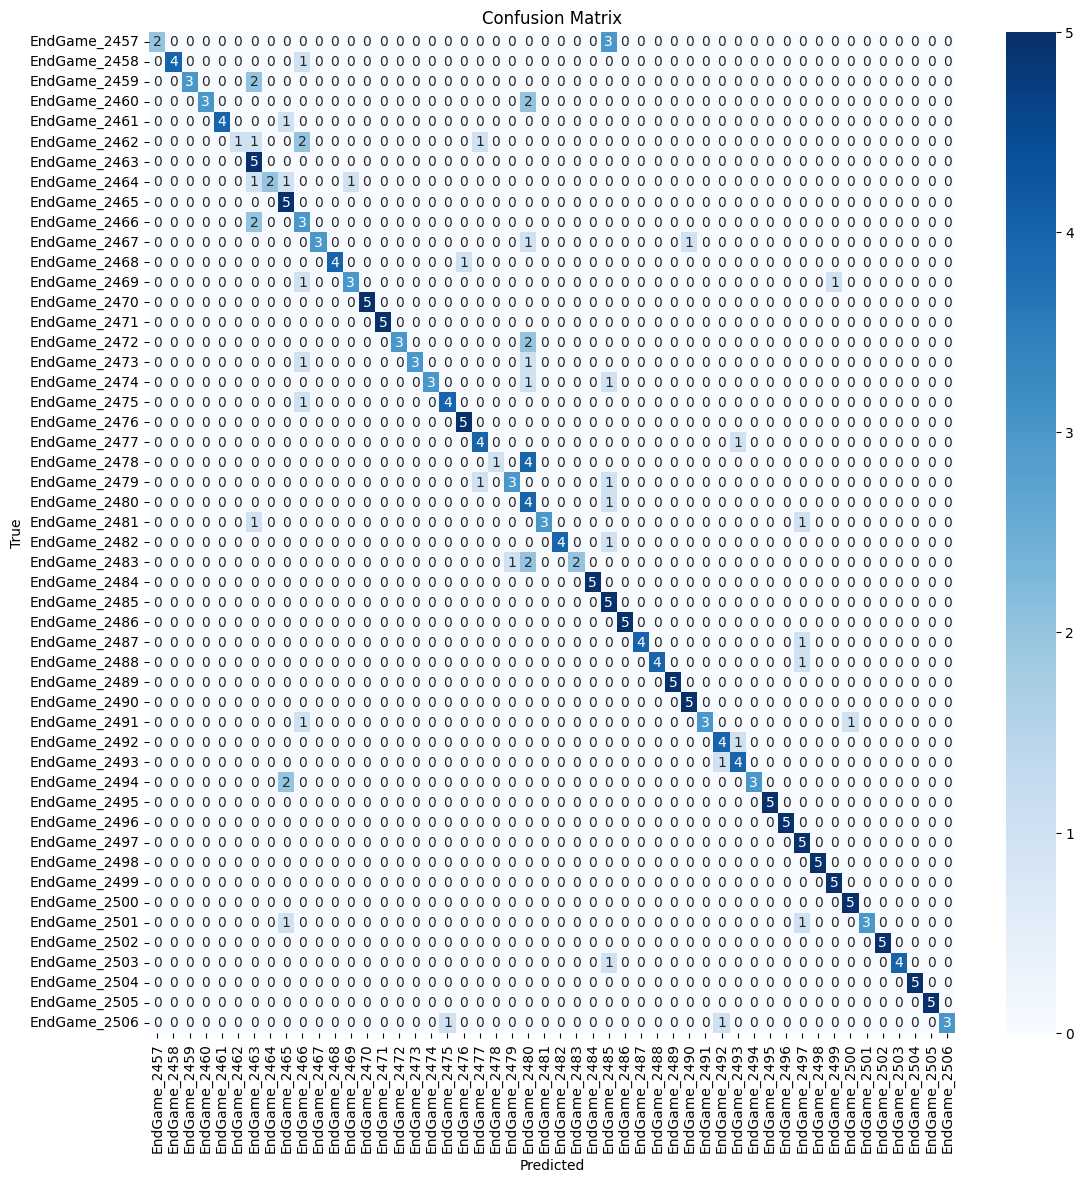

In [ ]:
# ----------------seaborn呈現confusion matrix------------------
plt.figure(figsize=(13, 13)) # cell要設置在欲呈現的圖案上
sns.heatmap(cm,
      annot=True,
      fmt="d",
      cmap="Blues",
      xticklabels=label,
      yticklabels=label
)
# plt.xticks(rotation=-90)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
# plt.savefig('confusion_matrix.png')
plt.show()

In [ ]:
fig = plt.gcf()
fig.set_size_imches(12,14)
plt.imshow(image)

In [ ]:
# 看單圖
path = "/content/drive/MyDrive/Tibame_AI_class/AI_project/endgame-johnwick/True/endgame-scene6.jpg"
image = Image.open(path)
size = (224, 224)
image = ImageOps.fit(image, size, Image.LANCZOS)
print(f"{path.split('/')[-1]}")
image

In [ ]:
# 測試圖檔變成array
image_true_path = "/content/drive/MyDrive/Tibame_AI_class/AI_project/50classes_test_meme/"
files = os.listdir(image_true_path)     # 目錄裡所有檔案
file_extensions = ["jpg", "jpeg", "png"]  # 圖片副檔名
pre_lists = []
datas = []
sum = 0
for f in files:
    if f.split(".")[-1].lower() in file_extensions: # 判斷圖片檔
        if sum == 1:
            break
        else:
            data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
            image = Image.open(f"{image_true_path}{f}").convert("RGB")
            size = (224, 224)
            # image = ImageOps.fit(image, size, Image.Resampling.LANCZOS) # 這行會報錯Resampling is not defined
            image = ImageOps.fit(image, size, Image.LANCZOS)
            image_array = np.asarray(image)

            normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1
            data = np.append(data, normalized_image_array)
        sum += 1